# **Online Retail Analysis**

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [160]:
df_original = pd.read_csv("Online Retail.csv")
df = df_original.copy()

In [161]:
df.shape

(541909, 8)

In [162]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Cleaning

In [164]:
# Drop null values in "CustomerID" for further customer behaviour analysis
df.dropna(subset=["CustomerID"], inplace=True)

In [165]:
df.drop_duplicates(inplace=True)

In [166]:
df["CustomerID"] = df["CustomerID"].astype(int).astype(str)

In [167]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%y %H:%M")

In [168]:
# Only keep the data from 01/12/10 to 30/11/11 (one year analysis)
df = df[df["InvoiceDate"] < "2011-12-01"]

In [169]:
df[df["UnitPrice"] == 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom


In [170]:
# Drop the rows where "UnitPrice" is 0 beacuse it might influence the average
df = df[df["UnitPrice"] != 0]

In [171]:
# Create a new column "Value" which represents the total value of each line
df["Value"] = df["Quantity"] * df["UnitPrice"]

In [172]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384182 entries, 0 to 516383
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    384182 non-null  object        
 1   StockCode    384182 non-null  object        
 2   Description  384182 non-null  object        
 3   Quantity     384182 non-null  int64         
 4   InvoiceDate  384182 non-null  datetime64[ns]
 5   UnitPrice    384182 non-null  float64       
 6   CustomerID   384182 non-null  object        
 7   Country      384182 non-null  object        
 8   Value        384182 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 29.3+ MB


In [174]:
# Check if there is different labels for the same country (e.g. United Kingdom and UK)
df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

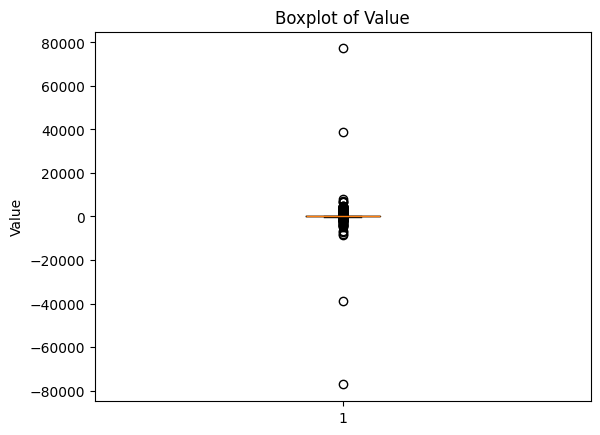

In [175]:
# Check if there are outliers
plt.boxplot(df["Value"])
plt.title("Boxplot of Value")
plt.ylabel("Value")
plt.show()

In [176]:
# Check the outliers data
df[(df["Value"] > 20000) | (df["Value"] < -20000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Value
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.6
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098,United Kingdom,-38970.0


In [177]:
# These outliers exceed the typical range of values in our dataset and likely don't reflect normal transactions
# and their total value is zero (they were probably refunded to the customers)
# so, let's remove them from our analysis

df = df[(df["Value"] <= 20000) & (df["Value"] >= -20000)]

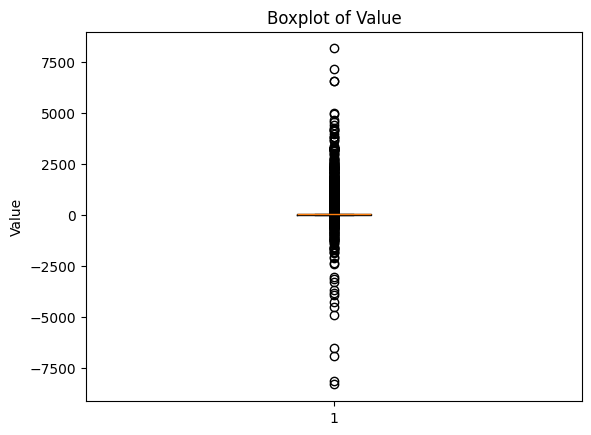

In [178]:
# Check the new distribution
plt.boxplot(df["Value"])
plt.title("Boxplot of Value")
plt.ylabel("Value")
plt.show()

In [179]:
# Save the cleaned data in a new file
df.to_csv("Online_Retail_Cleaned.csv")

## Analysis

### Summary

In [180]:
# Calculate total net sales (including postage, discounts, returns)
total_net_sales = round(df["Value"].sum())
print(f"{total_net_sales:,.0f}" + " £")

7,936,980 £


In [181]:
# Calculate total net sales by month
net_sales_by_month = round(df.groupby(df["InvoiceDate"].dt.to_period("M"))["Value"].sum().reset_index())
net_sales_by_month

,InvoiceDate,Value
0,2010-12,552373.0
1,2011-01,473732.0
2,2011-02,435534.0
3,2011-03,578576.0
4,2011-04,425223.0
5,2011-05,647012.0
6,2011-06,606863.0
7,2011-07,573112.0
8,2011-08,615078.0
9,2011-09,929356.0


In [182]:
# Create a graph which shows the net sales trends per month 

net_sales_by_month["InvoiceDate"] = net_sales_by_month["InvoiceDate"].dt.to_timestamp()

fig = px.line(
    net_sales_by_month,
    x="InvoiceDate",
    y="Value",
    title="Monthly Net Sales Trends from 1st Dec 2010 to 30th Nov 2011",
    labels={"InvoiceDate": "Month", "Value": "Total Net Sales (£)"},
    markers=True
)


fig.update_xaxes(
    tickformat="%b %Y",
    tickvals=net_sales_by_month["InvoiceDate"],  
    tickangle=45 
)


fig.update_layout(
    yaxis=dict(showgrid=True),
    xaxis=dict(showgrid=False),
    font=dict(family="Arial", size=12)  
)

fig.show()


### Refunds

In [183]:
# Calculate total refunds (including returns, discounts)
refunds = df[df["Value"] < 0] # Select only the negative values

total_refunds = -round(refunds["Value"].sum())
print(f"{total_refunds:,.0f}" + " £")


316,885 £


In [184]:
# Calculate total refunds by month
refund_by_month = round(refunds.groupby(df["InvoiceDate"].dt.to_period("M"))["Value"].sum().reset_index())
refund_by_month["Value"] = -refund_by_month["Value"]
refund_by_month

,InvoiceDate,Value
0,2010-12,18050.0
1,2011-01,17186.0
2,2011-02,10551.0
3,2011-03,15506.0
4,2011-04,43152.0
5,2011-05,30343.0
6,2011-06,14214.0
7,2011-07,25851.0
8,2011-08,28973.0
9,2011-09,21334.0


In [185]:
# Calculate total gross sales (including postage)
gross_sales = df[df["Value"] > 0] # Select only the positive values

total_gross_sales = round(gross_sales["Value"].sum())
print(f"{total_gross_sales:,.0f}" + " £")

8,253,865 £


In [186]:
# Check we find total net sales by substracting total_gross_sales and total_refund
print(f"{total_gross_sales - total_refunds:,.0f}" + " £")

7,936,980 £


In [187]:
# Calculate total gross sales by month
gross_sales_by_month = round(df[df["Value"] > 0].groupby(df["InvoiceDate"].dt.to_period("M"))["Value"].sum().reset_index())
gross_sales_by_month

,InvoiceDate,Value
0,2010-12,570423.0
1,2011-01,490918.0
2,2011-02,446085.0
3,2011-03,594082.0
4,2011-04,468374.0
5,2011-05,677355.0
6,2011-06,621076.0
7,2011-07,598963.0
8,2011-08,644051.0
9,2011-09,950690.0


In [188]:
# Calculate the refund as a % of total gross sales

total_refund_rate = round((total_refunds/total_gross_sales)*100)
print(f"{total_refund_rate}%")

4%


In [189]:
# Calculate the refund rate per month

# Rename "Value" by "Refund" in refund_by_month
refund_by_month.rename(columns={"Value": "Refund"}, inplace=True)

# Rename "Value" by "Gross Value" in gross_sales_by_month
gross_sales_by_month.rename(columns={"Value": "Gross Value"}, inplace=True)

# Merge gross_sales_by_month with refund_by_month on "InvoiceDate"
refund_rate_by_month = pd.merge(gross_sales_by_month, refund_by_month, on="InvoiceDate", how="left")

# Calculate the refund rate
refund_rate_by_month["Refund Rate (%)"] = round((refund_rate_by_month["Refund"] / refund_rate_by_month["Gross Value"]) * 100, 2)
refund_rate_by_month


,InvoiceDate,Gross Value,Refund,Refund Rate (%)
0,2010-12,570423.0,18050.0,3.16
1,2011-01,490918.0,17186.0,3.50
2,2011-02,446085.0,10551.0,2.37
3,2011-03,594082.0,15506.0,2.61
4,2011-04,468374.0,43152.0,9.21
5,2011-05,677355.0,30343.0,4.48
6,2011-06,621076.0,14214.0,2.29
7,2011-07,598963.0,25851.0,4.32
8,2011-08,644051.0,28973.0,4.50
9,2011-09,950690.0,21334.0,2.24


In [190]:
# Create a graph which shows the refund rate by month

refund_rate_by_month["InvoiceDate"] = refund_rate_by_month["InvoiceDate"].dt.to_timestamp()

fig = px.line(
    refund_rate_by_month,
    x="InvoiceDate",
    y="Refund Rate (%)",
    title="Refund Rate as a % of Total Gross Sales",
    labels={"InvoiceDate": "Month", "Refund Rate (%)": "Refund Rate (%)"},
    markers=True
)

fig.update_xaxes(
    tickformat="%b %Y",
    tickvals=refund_rate_by_month["InvoiceDate"],  
    tickangle=45 
)

fig.update_layout(
    yaxis=dict(showgrid=True),
    xaxis=dict(showgrid=False),
    font=dict(family="Arial", size=12)  
)

fig.show()



### Average order value

In [191]:
# Calculate average order value (including the orders which will be returned and refunded)

unique_invoices = gross_sales['InvoiceNo'].nunique() # Don't count the invoices starting with C (only the positive values)
average_order_value = round(total_gross_sales / unique_invoices)
print(f"{average_order_value} £")

465 £


### Countries

In [192]:
# 10 countries with the biggest value
net_sales_by_country = round(df.groupby("Country")["Value"].sum().sort_values(ascending=False).reset_index())
top_10_countries = net_sales_by_country.head(10)
top_10_countries

,Country,Value
0,United Kingdom,6450203.0
1,Netherlands,272934.0
2,EIRE,243025.0
3,Germany,213705.0
4,France,189577.0
5,Australia,137010.0
6,Switzerland,55739.0
7,Spain,54485.0
8,Belgium,39502.0
9,Sweden,36585.0


In [193]:
# UK percentage of Net Sales
UK_total_sales = 6450203
UK_percentage = round(UK_total_sales/total_net_sales, 2)
print(f"{UK_percentage*100} %")

81.0 %


In [194]:
# Define color mapping based on the Value
def get_color(value):
    if value > 1000000:
        return "Above 1M"
    elif value > 100000:
        return "Above 100k"
    else:
        return "Above 10k"

top_10_countries["Colour"] = top_10_countries["Value"].apply(get_color)

# Create a bar plot for the top countries by total value with custom color
fig = px.bar(
    top_10_countries, 
    x="Country",
    y="Value",
    title="Top 10 Countries by Total Value",
    labels={"Value": "Total Value (£)", "Country": "Country"},
    color="Colour",  # Color based on the custom color mapping
)

# Set logarithmic scale for y-axis to better visualize differences
fig.update_yaxes(type="log")

fig.update_layout(font=dict(family="Arial"))

# Show the figure
fig.show()


### Customers

In [195]:
# Top 10 customers and their countries
net_sales_by_customer = round(df.groupby(["CustomerID", "Country"])["Value"].sum().reset_index())
net_sales_by_customer = net_sales_by_customer.sort_values(by="Value", ascending=False)
top_10_customers = net_sales_by_customer.head(10)
top_10_customers


,CustomerID,Country,Value
1691,14646,Netherlands,267761.0
4199,18102,United Kingdom,244953.0
3728,17450,United Kingdom,185760.0
1882,14911,EIRE,125482.0
55,12415,Australia,123725.0
1337,14156,EIRE,113215.0
3771,17511,United Kingdom,80746.0
3175,16684,United Kingdom,60490.0
999,13694,United Kingdom,59559.0
2177,15311,United Kingdom,58218.0


In [196]:
# Calculate the percentage of sales that the top 10 customers generate
top_10_customers_percentage = round(top_10_customers["Value"].sum()/total_net_sales, 2)
print(f"{top_10_customers_percentage*100} %")

17.0 %


In [197]:
# Calculate the percentage the top 10 customers are of total customers
customers_total = df["CustomerID"].nunique()
print(f"Total of customers: {customers_total}")
percentage_top_10_customers = round(10/customers_total, 3)
print(f"Percentage of the top 10 customers: {percentage_top_10_customers*100} %")

Total of customers: 4329
Percentage of the top 10 customers: 0.2 %


In [198]:
# Create a graph to display the top 10 customers and their countries

fig = px.bar(
    top_10_customers,
    x="CustomerID",
    y="Value",
    color="Country",
    title="Top 10 Customers by Total £ Net Sales",
    labels={"Value": "Total Value (£)", "CustomerID": "Customer ID"},
)

fig.update_layout(font=dict(family="Arial"))

fig.show()


### Products

In [199]:
# Calculate the total number of products
products_total = df["Description"].nunique()
print(f"{products_total}")

3887


In [200]:
# Top 10 products sold (quantity)
top_10_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_10_products

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     51756
JUMBO BAG RED RETROSPOT               43923
ASSORTED COLOUR BIRD ORNAMENT         33941
WHITE HANGING HEART T-LIGHT HOLDER    33384
PACK OF 72 RETROSPOT CAKE CASES       33102
MINI PAINT SET VINTAGE                25589
POPCORN HOLDER                        25149
PACK OF 12 LONDON TISSUES             24688
PACK OF 60 PINK PAISLEY CAKE CASES    23913
RABBIT NIGHT LIGHT                    23374
Name: Quantity, dtype: int64

In [201]:
# Filter out postage
top_10_products_value = df[df["Description"] != "POSTAGE"].groupby("Description")["Value"].sum().sort_values(ascending=False).head(10)

# Calculate the percentage for each top-selling product
percentage = round((top_10_products_value / total_net_sales) * 100, 2)

top_10_products_percentage = pd.DataFrame({
    "Description": top_10_products_value.index,
    "Net Sales (£)": [round(value) for value in top_10_products_value.values],
    "Percentage of Total Net Sales (%)": percentage.values
})

# Calculate total for each column
total_net_sales_10 = top_10_products_percentage["Net Sales (£)"].sum()
total_percentage_10 = top_10_products_percentage["Percentage of Total Net Sales (%)"].sum()

# Create a total row
total_row = pd.DataFrame({
    "Description": ["Total"],
    "Net Sales (£)": [total_net_sales_10],
    "Percentage of Total Net Sales (%)": [total_percentage_10]
})

# Add the total row to the dataframe
top_10_products_percentage = pd.concat([top_10_products_percentage, total_row], ignore_index=True)

top_10_products_percentage



,Description,Net Sales (£),Percentage of Total Net Sales (%)
0,REGENCY CAKESTAND 3 TIER,128139,1.61
1,WHITE HANGING HEART T-LIGHT HOLDER,91775,1.16
2,JUMBO BAG RED RETROSPOT,81067,1.02
3,PARTY BUNTING,67163,0.85
4,ASSORTED COLOUR BIRD ORNAMENT,54332,0.68
5,RABBIT NIGHT LIGHT,44193,0.56
6,CHILLI LIGHTS,43805,0.55
7,PAPER CHAIN KIT 50'S CHRISTMAS,37570,0.47
8,JUMBO BAG PINK POLKADOT,35635,0.45
9,SPOTTY BUNTING,34413,0.43


In [202]:
import plotly.figure_factory as ff

fig = ff.create_table(top_10_products_percentage)

fig.show()


In [203]:
# Top 10 Products by Net Sales in May and June 2011

# Filter out postage and keep only records from May and June 2011
summer = df[(df["Description"] != "POSTAGE") & (df["InvoiceDate"].dt.to_period("M").astype(str).isin(["2011-05", "2011-06"]))]

# Group by product and calculate total sales
top_10_summer_products = summer.groupby("Description")["Value"].sum().reset_index().sort_values(by="Value", ascending=False).head(10)
top_10_summer_products

,Description,Value
1647,PARTY BUNTING,21590.25
1940,REGENCY CAKESTAND 3 TIER,19012.25
2586,WHITE HANGING HEART T-LIGHT HOLDER,15002.02
1225,JUMBO BAG RED RETROSPOT,13194.88
2347,SPOTTY BUNTING,12043.25
707,DOORMAT KEEP CALM AND COME IN,10317.65
1950,REGENCY TEAPOT ROSES,10219.60
1219,JUMBO BAG DOILEY PATTERNS,8355.74
143,ASSORTED COLOUR BIRD ORNAMENT,7499.19
255,BLACK RECORD COVER FRAME,7414.35


In [204]:
# Create a graph which displays the top 10 products by net sales in May and June

fig = px.bar(
    top_10_summer_products,
    x="Value",
    y="Description",
    title="Top 10 Products by Net Sales in May and June 2011",
    labels={"Value": "Net Sales (£)", "Description": "Product"},
    color_discrete_sequence=['orange']
)

fig.update_layout(
    xaxis_title="Net Sales (£)",
    yaxis_title="Product",
    font=dict(family="Arial"),
)

fig.show()

In [205]:
# Top 10 Products by Net Sales in December 2010 and November 2011

# Filter out postage and keep only records from December 2010 and November 2011
winter = df[(df["Description"] != "POSTAGE") & (df["InvoiceDate"].dt.to_period("M").astype(str).isin(["2010-12", "2011-11"]))]

# Group by product and calculate total sales
top_10_winter_products = winter.groupby("Description")["Value"].sum().reset_index().sort_values(by="Value", ascending=False).head(10)
top_10_winter_products

,Description,Value
2370,REGENCY CAKESTAND 3 TIER,26646.54
2262,RABBIT NIGHT LIGHT,23055.78
3201,WHITE HANGING HEART T-LIGHT HOLDER,22078.68
1989,PAPER CHAIN KIT 50'S CHRISTMAS,20583.31
637,CHILLI LIGHTS,15981.47
1518,JUMBO BAG RED RETROSPOT,14101.15
329,BLACK RECORD COVER FRAME,13692.30
193,ASSORTED COLOUR BIRD ORNAMENT,11846.14
1994,PAPER CHAIN KIT VINTAGE CHRISTMAS,11725.51
644,CHOCOLATE HOT WATER BOTTLE,10765.44


In [206]:
# Create a graph which displays the top 10 products by net sales in November and December

fig = px.bar(
    top_10_winter_products,
    x="Value",
    y="Description",
    title="Top 10 Products by Net Sales in December 2010 and November 2011",
    labels={"Value": "Net Sales (£)", "Description": "Product"},
)

fig.update_layout(
    xaxis_title="Net Sales (£)",
    yaxis_title="Product",
    font=dict(family="Arial"),
)

fig.show()